# Video Game Play Analysis

##### This is a short analysis on games popular between 1980 - 2023.


> **GOAL:** This is to showcase python skills by manipulating data and visualizing results using different libraries.


Here are the **questions** we want to answer:
1. What are the top 10 games under Adventure genre?
2. What are the top 10 games under RPG released in 2022?



In [ ]:
#Installing Python 3.9
!apt-get install python3.9
!apt-get update -y
!update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 2
!update-alternatives --config python3

# Select python version
!apt install python3-pip
!apt install python3.9-distutils
!python --version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.9 is already the newest version (3.9.18-1+jammy1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 229 kB in 1s (212 k

In [ ]:
# Import libraries
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

##Reading and exploring the data

Here is the link to the data source:
#####Kaggle: [Popular Video Games 1980 - 2023](https://www.kaggle.com/datasets/arnabchaki/popular-video-games-1980-2023/)

Please note that this data is scrapped from [Backlogged](https://www.backloggd.com/games/lib/popular/) using mostly Beautiful Soup.


In [ ]:
# Importing games file from Kaggle
data = pd.read_csv('games.csv', encoding='utf-8')
data.head(2)

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


## Data cleaning and processing

In [ ]:
# Choose relevant fields
data = data[['Title', 'Release Date', 'Genres', 'Plays']].drop_duplicates()
data.head(5)

,Title,Release Date,Genres,Plays
0,Elden Ring,"Feb 25, 2022","['Adventure', 'RPG']",17K
1,Hades,"Dec 10, 2019","['Adventure', 'Brawler', 'Indie', 'RPG']",21K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Adventure', 'RPG']",30K
3,Undertale,"Sep 15, 2015","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",28K
4,Hollow Knight,"Feb 24, 2017","['Adventure', 'Indie', 'Platform']",21K


In [ ]:
# Get release year

data['Year'] = data['Release Date'].str.strip().str[-4:]
data.head()

,Title,Release Date,Genres,Plays,Year
0,Elden Ring,"Feb 25, 2022","['Adventure', 'RPG']",17K,2022
1,Hades,"Dec 10, 2019","['Adventure', 'Brawler', 'Indie', 'RPG']",21K,2019
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Adventure', 'RPG']",30K,2017
3,Undertale,"Sep 15, 2015","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",28K,2015
4,Hollow Knight,"Feb 24, 2017","['Adventure', 'Indie', 'Platform']",21K,2017


In [ ]:
# Get game genre per row

data['Genres'] = data['Genres'].apply(lambda s: list(ast.literal_eval(s)))
data = data.explode('Genres')
data.head()

,Title,Release Date,Genres,Plays,Year
0,Elden Ring,"Feb 25, 2022",Adventure,17K,2022
0,Elden Ring,"Feb 25, 2022",RPG,17K,2022
1,Hades,"Dec 10, 2019",Adventure,21K,2019
1,Hades,"Dec 10, 2019",Brawler,21K,2019
1,Hades,"Dec 10, 2019",Indie,21K,2019


In [ ]:
# Converting 'K' to 1000

data['Plays'] = data['Plays'].replace({"K":"*1e3"}, regex=True).map(pd.eval).astype(int)
data

,Title,Release Date,Genres,Plays,Year
0,Elden Ring,"Feb 25, 2022",Adventure,17000,2022
0,Elden Ring,"Feb 25, 2022",RPG,17000,2022
1,Hades,"Dec 10, 2019",Adventure,21000,2019
1,Hades,"Dec 10, 2019",Brawler,21000,2019
1,Hades,"Dec 10, 2019",Indie,21000,2019
...,...,...,...,...,...
1510,Baldur's Gate 3,"Oct 06, 2020",Strategy,269,2020
1510,Baldur's Gate 3,"Oct 06, 2020",Tactical,269,2020
1510,Baldur's Gate 3,"Oct 06, 2020",Turn Based Strategy,269,2020
1511,The LEGO Movie Videogame,"Feb 04, 2014",Adventure,1700,2014


## Data Analysis and Visualization

##### 1. What are the top 10 games under Adventure genre?

In [ ]:
# Get top 10 games under Adventure genre

top10_adventure = data[(data['Genres'] == 'Adventure')].sort_values('Plays',ascending = False).iloc[:10]
top10_adventure

,Title,Release Date,Genres,Plays,Year
5,Minecraft,"Nov 18, 2011",Adventure,33000,2011
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",Adventure,30000,2017
23,Grand Theft Auto V,"Sep 17, 2013",Adventure,30000,2013
13,Portal 2,"Apr 18, 2011",Adventure,29000,2011
3,Undertale,"Sep 15, 2015",Adventure,28000,2015
19,Super Mario Odyssey,"Oct 27, 2017",Adventure,25000,2017
54,The Elder Scrolls V: Skyrim,"Nov 10, 2011",Adventure,22000,2011
41,Super Mario Galaxy,"Nov 01, 2007",Adventure,21000,2007
4,Hollow Knight,"Feb 24, 2017",Adventure,21000,2017
1,Hades,"Dec 10, 2019",Adventure,21000,2019


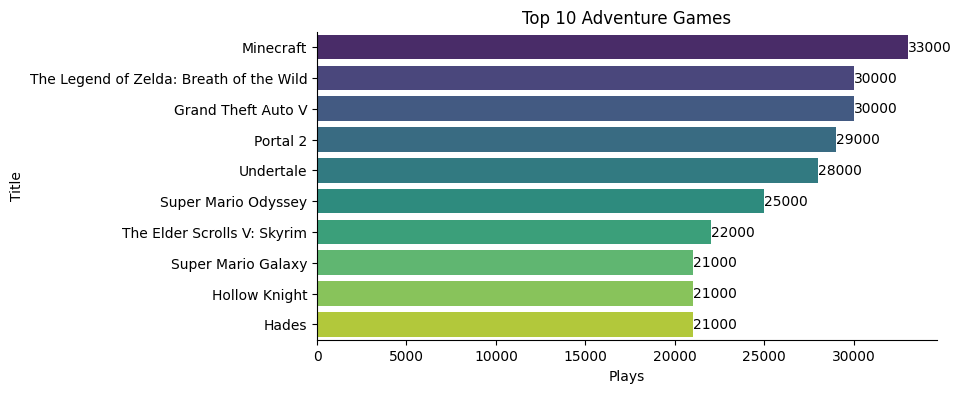

In [ ]:
# Visualization

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x = 'Plays', y = 'Title', data = top10_adventure, palette = "viridis").set_title('Top 10 Adventure Games')

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center', )  # vertical alignment
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

plt.show()

*The analysis shows the top 10 games under Adventure genre. Top 1 is Minecraft with 33,000 plays.*

#####2. What are the top 10 games under RPG released in 2022?

In [ ]:
# Get top 10 games under RPG released in 2022

top10_adventure_2022 = data[(data['Genres'] == 'RPG') & (data['Year'] == '2022')].sort_values('Plays',ascending = False).iloc[:10]
top10_adventure_2022

,Title,Release Date,Genres,Plays,Year
0,Elden Ring,"Feb 25, 2022",RPG,17000,2022
20,Pokémon Legends: Arceus,"Jan 28, 2022",RPG,9100,2022
26,Xenoblade Chronicles 3,"Jul 29, 2022",RPG,3900,2022
62,Tunic,"Mar 16, 2022",RPG,3400,2022
91,Pokémon Violet,"Nov 18, 2022",RPG,3400,2022
105,Cult of the Lamb,"Aug 11, 2022",RPG,2800,2022
162,Horizon Forbidden West,"Feb 18, 2022",RPG,2700,2022
158,Pokémon Scarlet,"Nov 18, 2022",RPG,2600,2022
169,Stranger of Paradise: Final Fantasy Origin,"Mar 18, 2022",RPG,1600,2022
615,Dying Light 2: Stay Human,"Feb 03, 2022",RPG,1400,2022


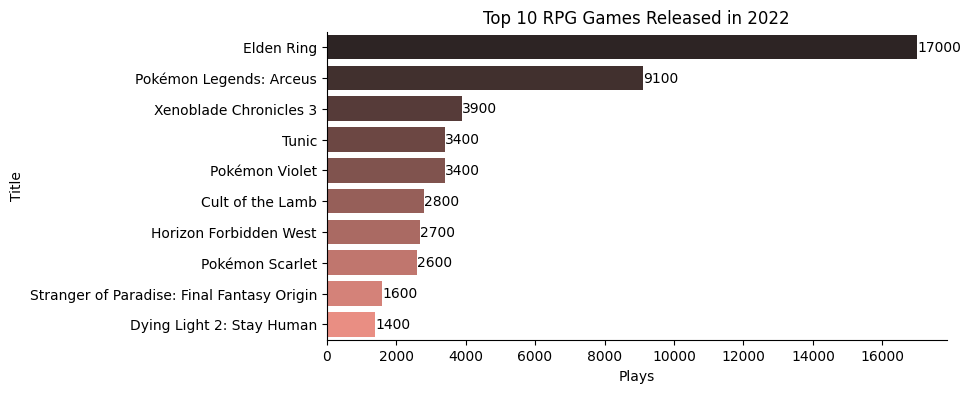

In [ ]:
# Visualization

fig, ax = plt.subplots(figsize=(8, 4))

sns.barplot(x = 'Plays', y = 'Title', data = top10_adventure_2022, palette = "dark:salmon").set_title('Top 10 RPG Games Released in 2022')


for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center', )  # vertical alignment
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.show()

*The analysis shows the top 10 RPG games released in 2022. Top 1 is Elden Ring with 17,000 plays.*